In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from typing import List
from sklearn.metrics import classification_report

In [172]:
# reading datasets
avc_full = pd.read_csv('AVC_full.csv')
avc_train = pd.read_csv('AVC_train.csv')
avc_test = pd.read_csv('AVC_test.csv')
salary_full = pd.read_csv('SalaryPrediction_full.csv')
salary_train = pd.read_csv('SalaryPrediction_train.csv')
salary_test = pd.read_csv('SalaryPrediction_test.csv')
salary_full.replace('?', np.nan, inplace=True)
salary_train.replace('?', np.nan, inplace=True)
salary_test.replace('?', np.nan, inplace=True)
avc_full.replace('not_defined', np.nan, inplace=True)
avc_train.replace('not_defined', np.nan, inplace=True)
avc_test.replace('not_defined', np.nan, inplace=True)
# getting numerical and categorical/ordinal columns
avc_numerics = ['mean_blood_sugar_level', 'body_mass_indicator', 'years_old', 'analysis_results', 'biological_age_index']
salary_numerics = ['fnl', 'hpw', 'gain', 'edu_int', 'years', 'loss', 'prod']

avc_full_numerics = avc_full[avc_numerics]
avc_full_cat_ord = avc_full[avc_full.columns.difference(avc_numerics + ['cerebrovascular_accident'])]
avc_train_numerics = avc_train[avc_numerics]
avc_train_cat_ord = avc_train[avc_train.columns.difference(avc_numerics + ['cerebrovascular_accident'])]
avc_test_numerics = avc_test[avc_numerics]
avc_test_cat_ord = avc_test[avc_test.columns.difference(avc_numerics + ['cerebrovascular_accident'])]

salary_full_numerics = salary_full[salary_numerics]
salary_full_cat_ord = salary_full[salary_full.columns.difference(salary_numerics + ['money'])]
salary_train_numerics = salary_train[salary_numerics]
salary_train_cat_ord = salary_train[salary_train.columns.difference(salary_numerics + ['money'])]
salary_test_numerics = salary_test[salary_numerics]
salary_test_cat_ord = salary_test[salary_test.columns.difference(salary_numerics + ['money'])]

       mean_blood_sugar_level  body_mass_indicator    years_old  analysis_results  biological_age_index
count             5110.000000          4909.000000  5110.000000       4599.000000           5110.000000
mean               106.147677            28.893237    46.568665        323.523446            134.784256
std                 45.283560             7.854067    26.593912        101.577442             50.399352
min                 55.120000            10.300000     0.080000        104.829714            -15.109456
25%                 77.245000            23.500000    26.000000        254.646209             96.710581
50%                 91.885000            28.100000    47.000000        301.031628            136.374631
75%                114.090000            33.100000    63.750000        362.822769            172.507322
max                271.740000            97.600000   134.000000        756.807975            266.986321


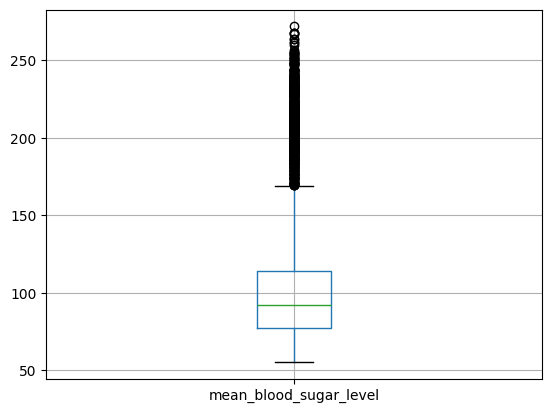

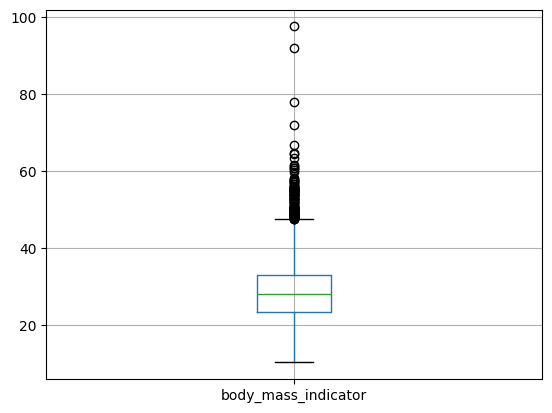

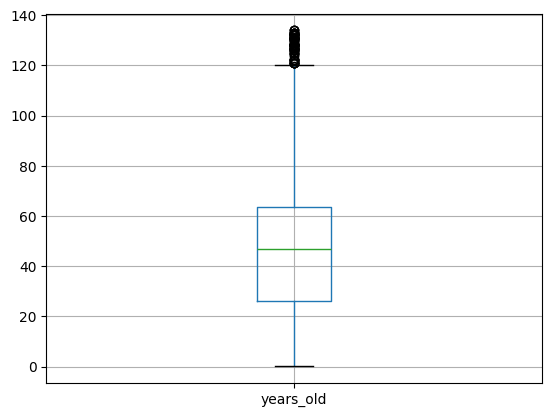

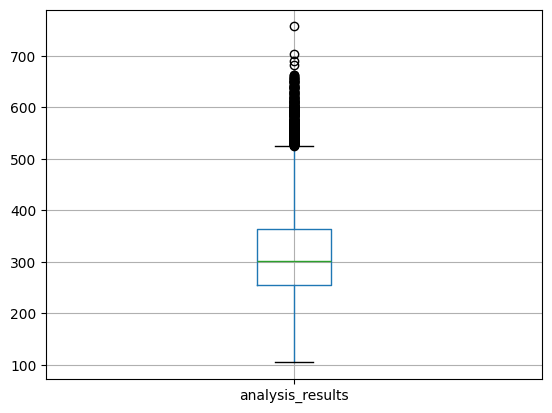

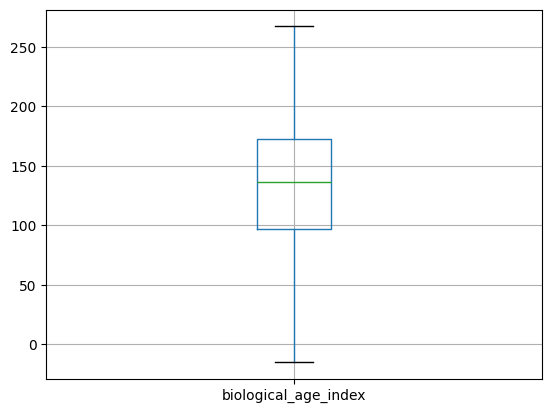

In [173]:
# displaying numerical variable's description and plotting distributions for avc

with pd.option_context('expand_frame_repr', False):
    print(avc_full_numerics.describe())

for column in avc_full_numerics.columns:
    avc_full_numerics.boxplot(column)
    plt.show()

                fnl          hpw          gain      edu_int        years         loss           prod
count  9.999000e+03  9199.000000   9999.000000  9999.000000  9999.000000  9999.000000    9999.000000
mean   1.903529e+05    40.416241    979.853385    14.262026    38.646865    84.111411    2014.927593
std    1.060709e+05    12.517356   7003.795382    24.770835    13.745101   394.035484   14007.604496
min    1.921400e+04     1.000000      0.000000     1.000000    17.000000     0.000000     -28.000000
25%    1.182825e+05    40.000000      0.000000     9.000000    28.000000     0.000000      42.000000
50%    1.784720e+05    40.000000      0.000000    10.000000    37.000000     0.000000      57.000000
75%    2.373110e+05    45.000000      0.000000    13.000000    48.000000     0.000000      77.000000
max    1.455435e+06    99.000000  99999.000000   206.000000    90.000000  3770.000000  200125.000000


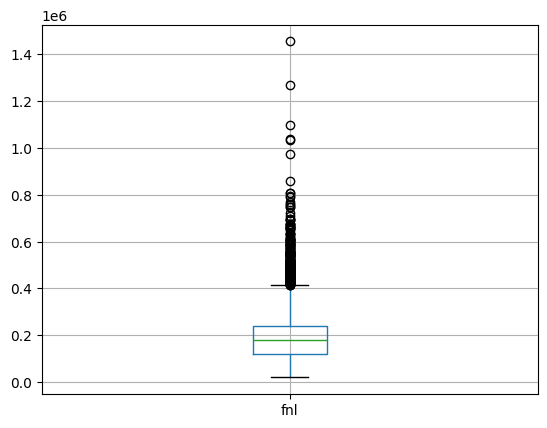

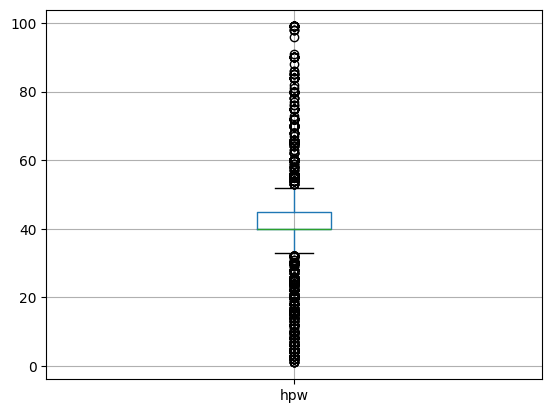

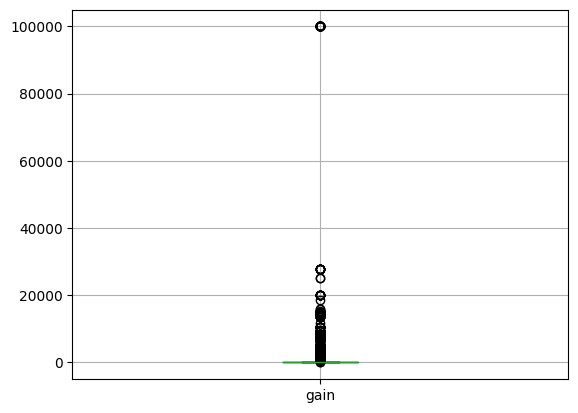

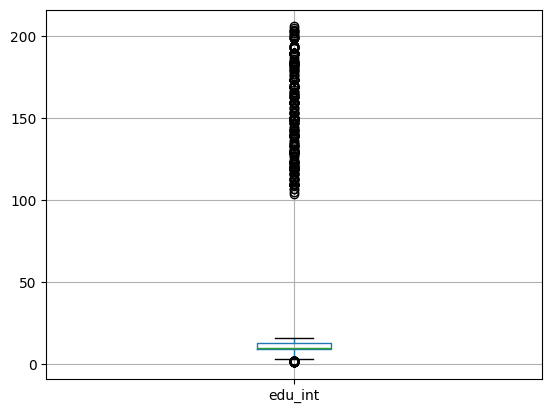

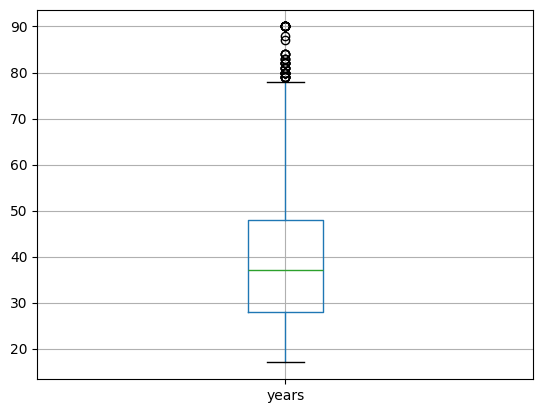

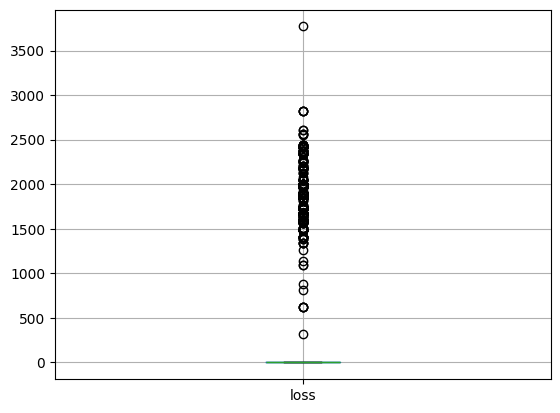

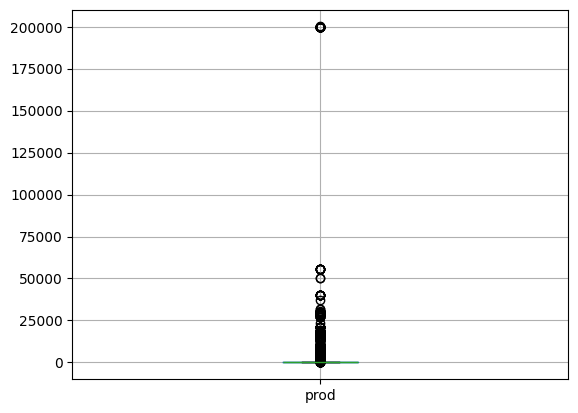

In [174]:
# displaying numerical variable's description and plotting distributions for salary
with pd.option_context('expand_frame_repr', False):
    print(salary_full_numerics.describe())

for column in salary_full_numerics.columns:
    salary_full_numerics.boxplot(column)
    plt.show()

                       Non_Null_Count  Unique_Count
cardiovascular_issues            5110             2
chaotic_sleep                    5110             2
high_blood_pressure              5110             2
job_category                     5110             5
living_area                      5110             2
married                          4599             2
sex                              5110             2
tobacco_usage                    3566             3


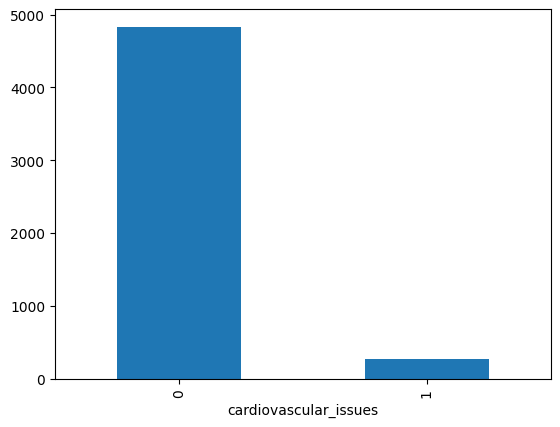

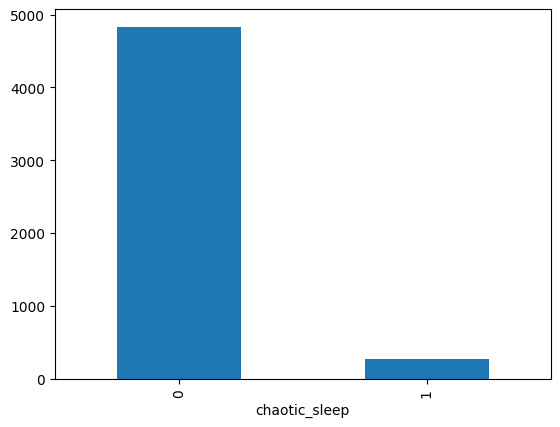

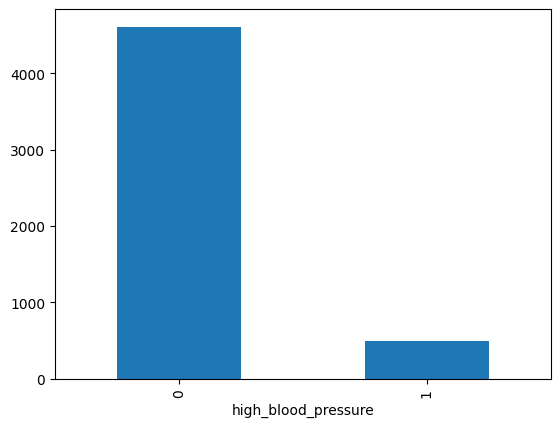

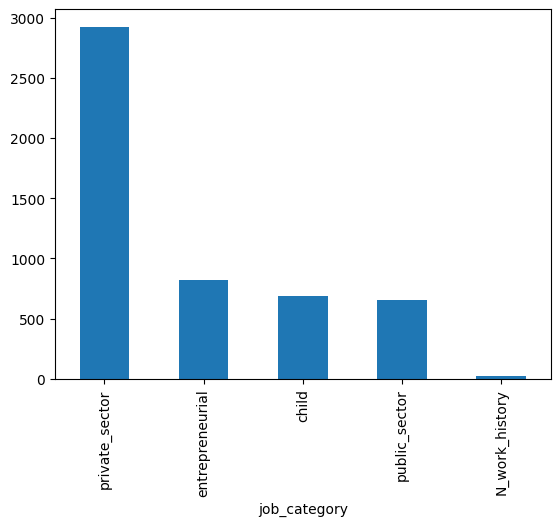

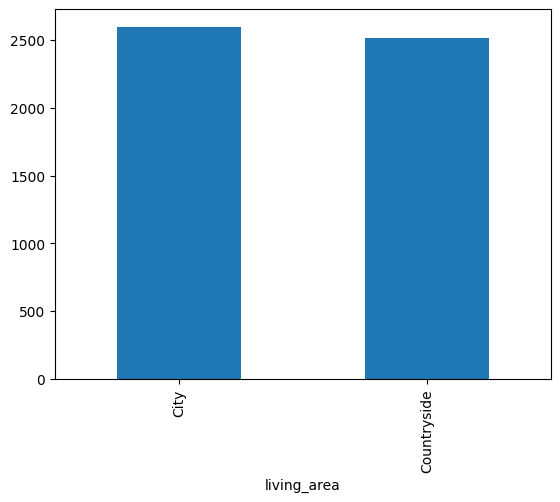

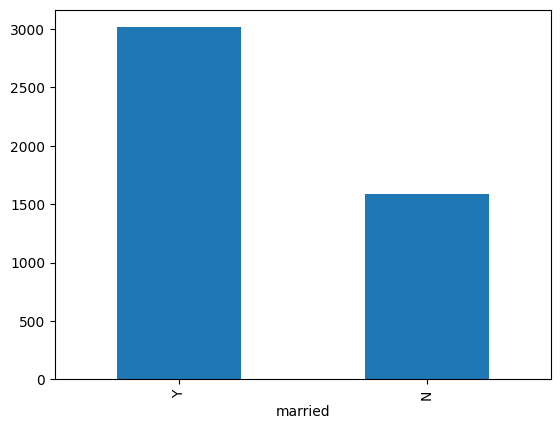

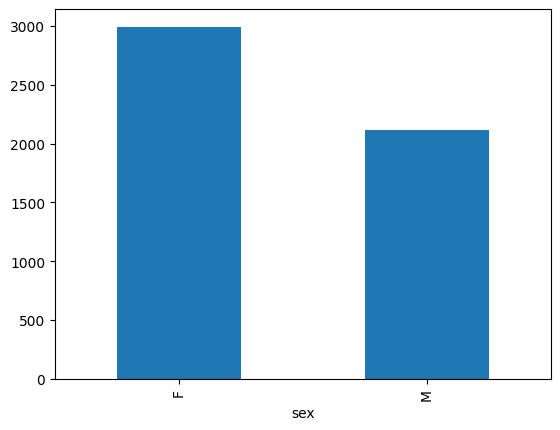

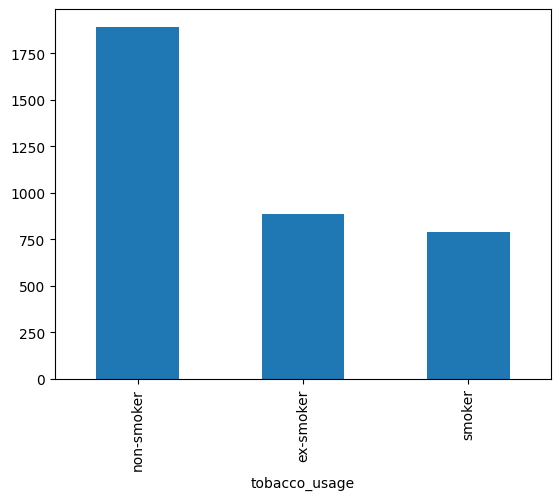

In [175]:
# displaying ordinal and categorical variable's description and plotting for avc
describe_avc_cat_ord = pd.DataFrame({
    'Non_Null_Count': avc_full_cat_ord.notnull().sum(),
    'Unique_Count': avc_full_cat_ord.nunique()
})
print(describe_avc_cat_ord)

for column in avc_full_cat_ord.columns:
    avc_full_cat_ord[column].value_counts().plot(kind='bar')
    plt.show()

           Non_Null_Count  Unique_Count
country              9841            40
edu                  9999            16
gender               9199             2
gtype                9999             2
job                  9417            13
partner              9999             7
race                 9999             5
relation             9999             6
work_type            9419             8


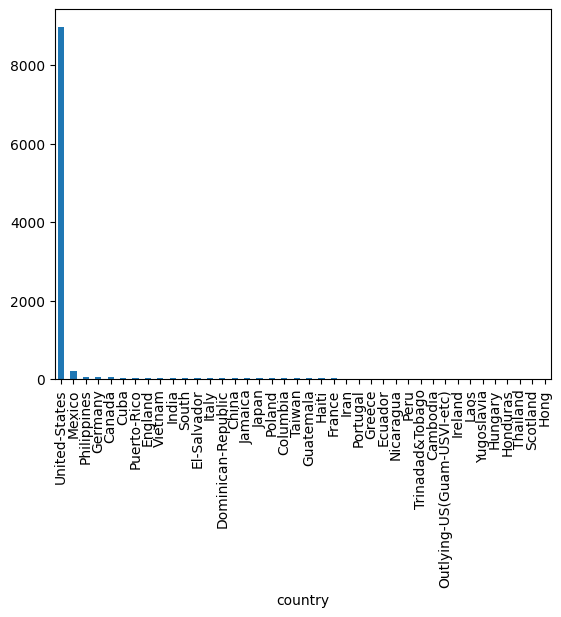

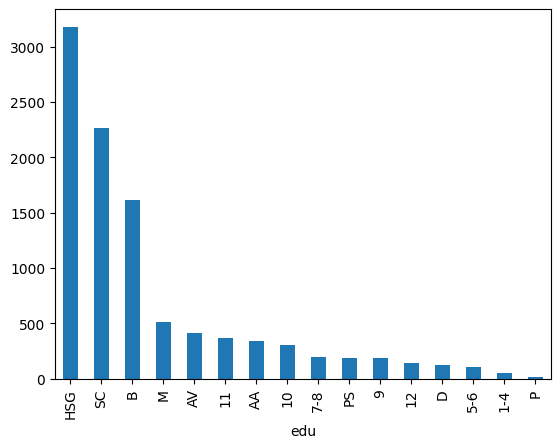

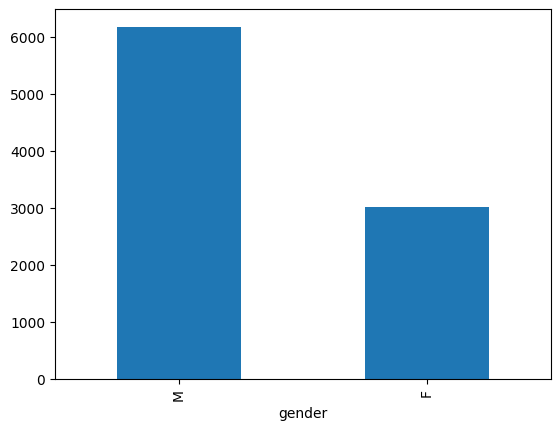

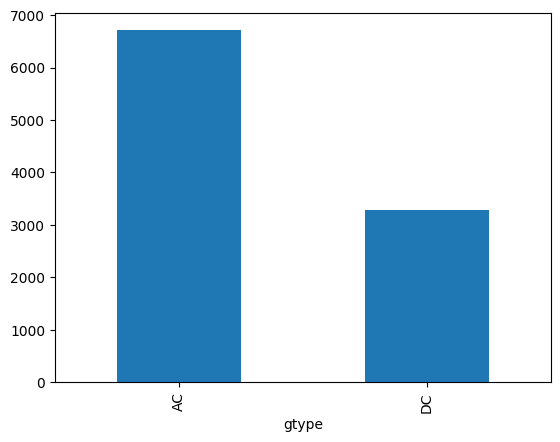

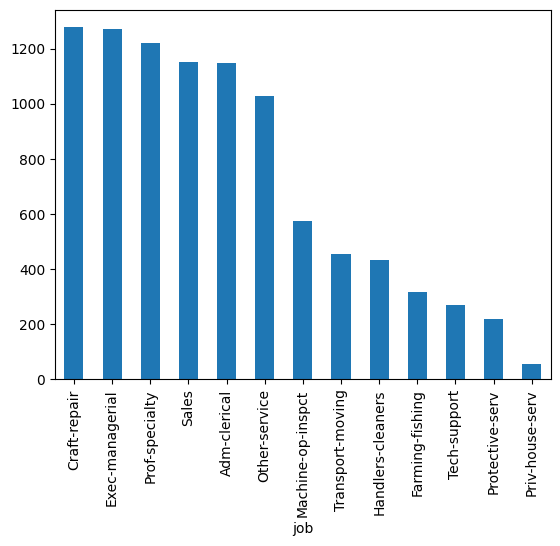

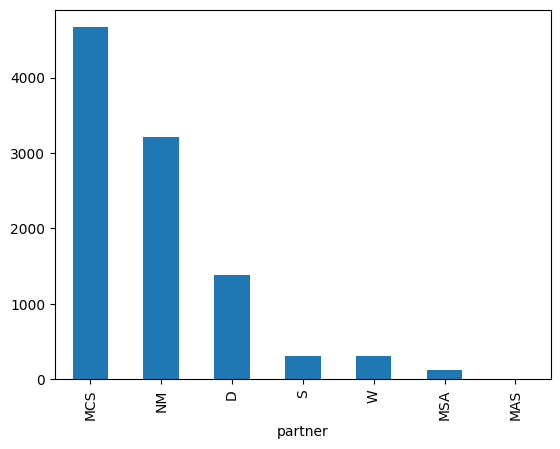

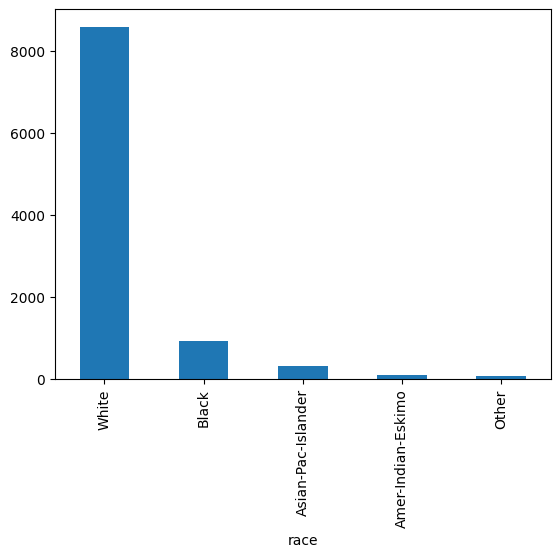

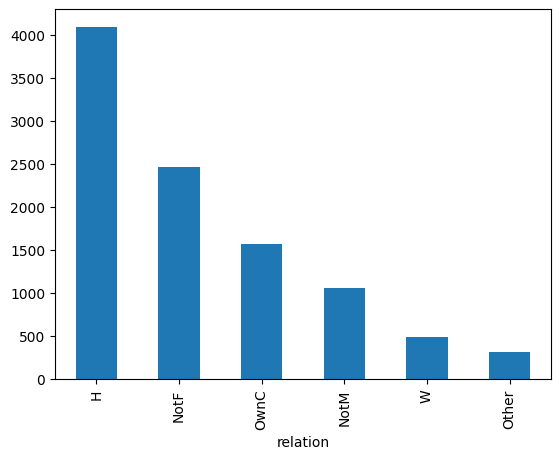

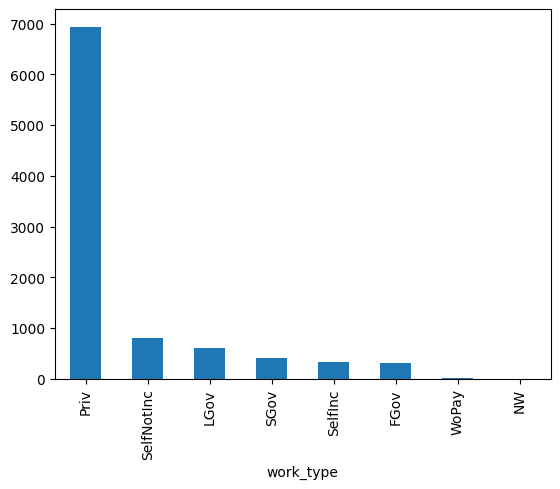

In [176]:
# displaying ordinal and categorical variable's description and plotting for salary
describe_salary_full_cat_ord = pd.DataFrame({
    'Non_Null_Count': salary_full_cat_ord.notnull().sum(),
    'Unique_Count': salary_full_cat_ord.nunique()
})
print(describe_salary_full_cat_ord)

for column in salary_full_cat_ord.columns:
    salary_full_cat_ord[column].value_counts().plot(kind='bar')
    plt.show()

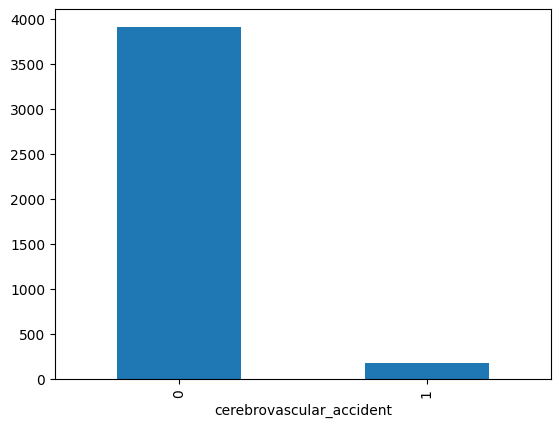

In [177]:
# plotting class frequency for avc train
avc_train['cerebrovascular_accident'].value_counts().plot(kind='bar')
plt.show()

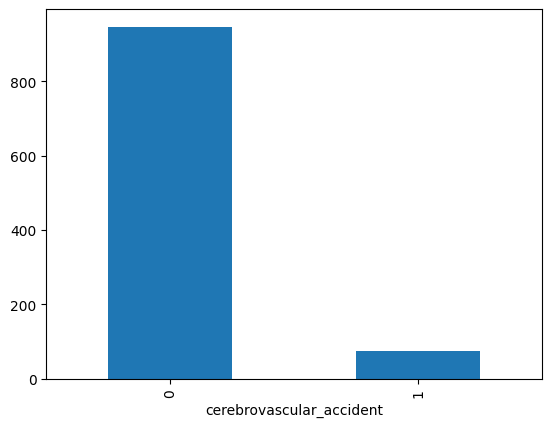

In [178]:
# plotting class frequency for avc test
avc_test['cerebrovascular_accident'].value_counts().plot(kind='bar')
plt.show()

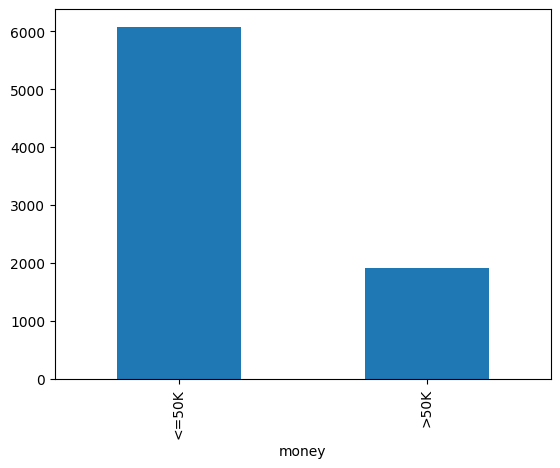

In [179]:
# plotting class frequency for salary train
salary_train['money'].value_counts().plot(kind='bar')
plt.show()

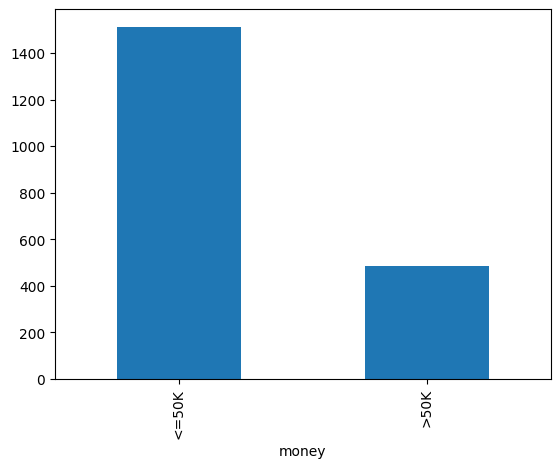

In [180]:
# plotting class frequency for salary test
salary_test['money'].value_counts().plot(kind='bar')
plt.show()

In [181]:
def plot_correlation(correlation_matrix, Min, Max, nattr, columns, size):
    # create a new figure
    fig = plt.figure(figsize=(size, size))

    # 111: 1x1 grid, first subplot
    ax = fig.add_subplot(111)

    # normalize data using vmin, vmax
    cax = ax.matshow(correlation_matrix, vmin=Min, vmax=Max)

    # add a colorbar to a plot.
    fig.colorbar(cax)

    # define ticks
    ticks = np.arange(0,nattr,1)

    # set x and y tick marks
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    # set x and y tick labels
    ax.set_xticklabels(columns)
    ax.set_yticklabels(columns)

    # draw a matrix using the correlations data
    plt.show()

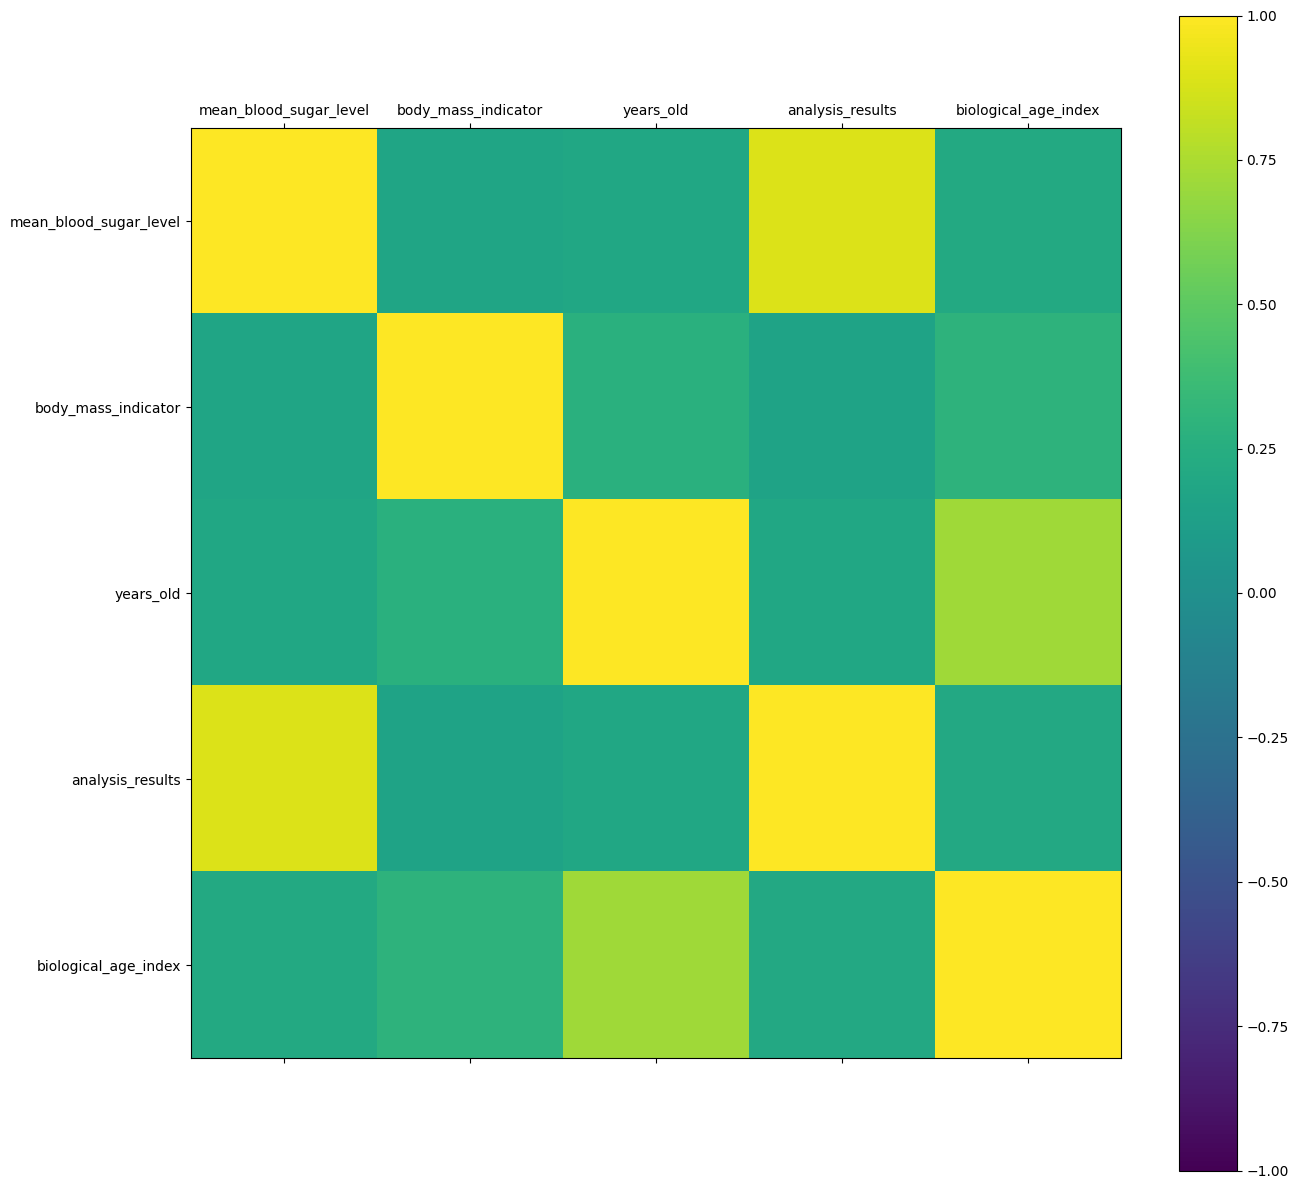

In [182]:
# testing correlation between numerical atributes for avc
# calculate correlation between all columns
avc_correlations = avc_full_numerics.corr()
plot_correlation(avc_correlations, -1, 1, 5, avc_numerics, 15)

In [ ]:
# testing correlation between categorical/ordinal atributes for avc
avc_corr = pd.DataFrame(np.nan, index=avc_full_cat_ord.columns, columns=avc_full_cat_ord.columns)

for column1 in avc_full_cat_ord.columns:
    for column2 in avc_full_cat_ord.columns:
        CrosstabResult=pd.crosstab(index=avc_full_cat_ord[column1],columns=avc_full_cat_ord[column2])
        # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult)
        
        # P-Value is the Probability of H0 being True
        avc_corr[column1][column2] = ChiSqResult[1]

plot_correlation(avc_corr, 0, 1, 8, list(avc_full_cat_ord.columns), 20)


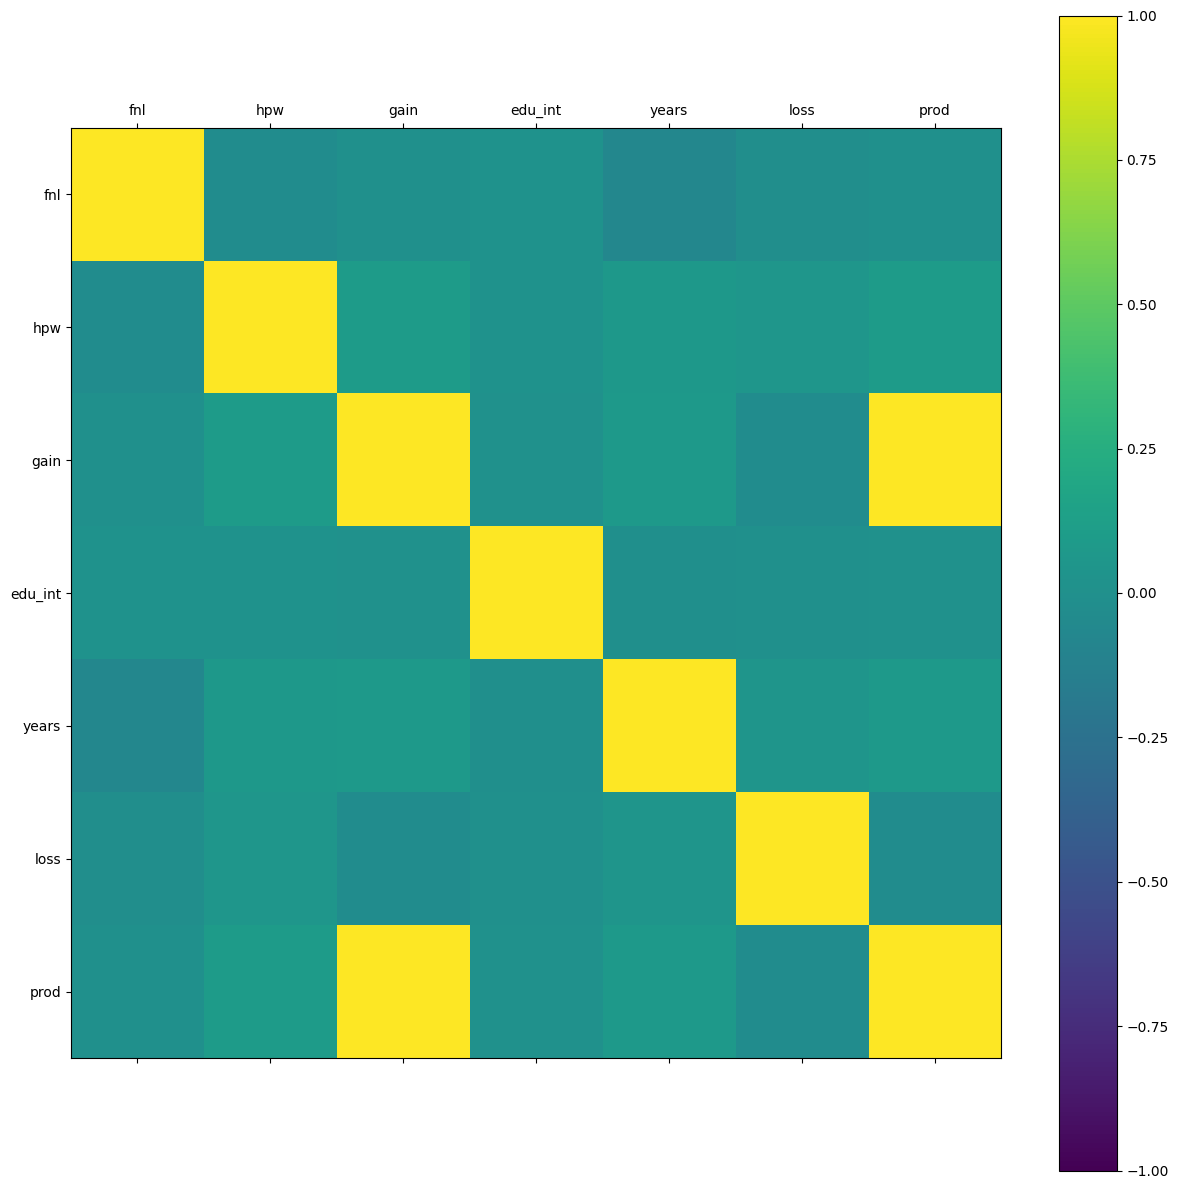

In [184]:
# testing correlation between numerical atributes for salary
# calculate correlation between all columns
salary_correlations = salary_full_numerics.corr()
plot_correlation(salary_correlations, -1, 1, 7, salary_numerics, 15)

In [ ]:
# testing correlation between categorical/ordinal atributes for salary
salary_corr = pd.DataFrame(np.nan, index=salary_full_cat_ord.columns, columns=salary_full_cat_ord.columns)

for column1 in salary_full_cat_ord.columns:
    for column2 in salary_full_cat_ord.columns:
        CrosstabResult=pd.crosstab(index=salary_full_cat_ord[column1],columns=salary_full_cat_ord[column2])
        # Performing Chi-sq test
        ChiSqResult = chi2_contingency(CrosstabResult)
        
        # P-Value is the Probability of H0 being True
        salary_corr[column1][column2] = ChiSqResult[1]

plot_correlation(salary_corr, 0, 1, 9, list(salary_full_cat_ord.columns), 20)


In [186]:
#removing outliers from avc numerics
for column in avc_train_numerics.columns:
    Q1 = avc_train[column].quantile(0.25)
    Q3 = avc_train[column].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    avc_train.loc[(avc_train[column] < Q1 - threshold * IQR) | (avc_train[column] > Q3 + threshold * IQR), column] = np.nan

In [187]:
# removing outliers from salary numerics
for column in salary_train_numerics.columns:
    Q1 = salary_train[column].quantile(0.1 if (column == 'loss' or column == 'gain') else 0.25)
    Q3 = salary_train[column].quantile(0.9 if (column == 'loss' or column == 'gain') else 0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    salary_train.loc[(salary_train[column] < Q1 - threshold * IQR) | (salary_train[column] > Q3 + threshold * IQR), column] = np.nan

In [188]:
def simple_impute_data(train_data, train_data_numerics, train_data_cat_ord, test_data, test_data_numerics, test_data_cat_ord):
    imp_num = SimpleImputer()
    imp_cat = SimpleImputer(strategy='most_frequent')

    # fitting and imputing on train data
    imputed_cols = imp_num.fit_transform(train_data_numerics)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=train_data_numerics.columns, index=train_data_numerics.index)
    train_data_numerics.update(imputed_cols_df)
    train_data.update(train_data_numerics) 

    # imputing on test data
    imputed_cols = imp_num.transform(test_data_numerics)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=test_data_numerics.columns, index=test_data_numerics.index)
    test_data_numerics.update(imputed_cols_df)
    test_data.update(test_data_numerics) 


    # fitting and imputing on train data
    imputed_cols = imp_cat.fit_transform(train_data_cat_ord)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=train_data_cat_ord.columns, index=train_data_cat_ord.index)
    train_data_cat_ord.update(imputed_cols_df)
    train_data.update(train_data_cat_ord) 

    # imputing on test data
    imputed_cols = imp_cat.transform(test_data_cat_ord)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=test_data_cat_ord.columns, index=test_data_cat_ord.index)
    test_data_cat_ord.update(imputed_cols_df)
    test_data.update(test_data_cat_ord)


In [189]:
def iterative_impute_data(train_data, train_data_numerics, train_data_cat_ord, test_data, test_data_numerics, test_data_cat_ord):
    imp_num = IterativeImputer()
    imp_cat = SimpleImputer(strategy='most_frequent')
    
    # fitting and imputing on train data
    imputed_cols = imp_num.fit_transform(train_data_numerics)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=train_data_numerics.columns, index=train_data_numerics.index)
    train_data_numerics.update(imputed_cols_df)
    train_data.update(train_data_numerics) 

    # imputing on test data
    imputed_cols = imp_num.transform(test_data_numerics)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=test_data_numerics.columns, index=test_data_numerics.index)
    test_data_numerics.update(imputed_cols_df)
    test_data.update(test_data_numerics) 


    # fitting and imputing on train data
    imputed_cols = imp_cat.fit_transform(train_data_cat_ord)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=train_data_cat_ord.columns, index=train_data_cat_ord.index)
    train_data_cat_ord.update(imputed_cols_df)
    train_data.update(train_data_cat_ord) 

    # imputing on test data
    imputed_cols = imp_cat.transform(test_data_cat_ord)
    imputed_cols_df = pd.DataFrame(imputed_cols, columns=test_data_cat_ord.columns, index=test_data_cat_ord.index)
    test_data_cat_ord.update(imputed_cols_df)
    test_data.update(test_data_cat_ord)


In [190]:
# imputing avc data
# simple_impute_data(avc_train, avc_train_numerics, avc_train_cat_ord, avc_test, avc_test_numerics, avc_test_cat_ord)
iterative_impute_data(avc_train, avc_train_numerics, avc_train_cat_ord, avc_test, avc_test_numerics, avc_test_cat_ord)

In [191]:
# imputing salary data
# simple_impute_data(salary_train, salary_train_numerics, salary_train_cat_ord, salary_test, salary_test_numerics, salary_test_cat_ord)
iterative_impute_data(salary_train, salary_train_numerics, salary_train_cat_ord, salary_test, salary_test_numerics, salary_test_cat_ord)


In [192]:
# removing useless attributes avc
avc_train.drop('mean_blood_sugar_level', axis=1, inplace=True)
avc_test.drop('mean_blood_sugar_level', axis=1, inplace=True)

In [193]:
# removing useless attributes salary
salary_train.drop('prod', axis=1, inplace=True)
salary_test.drop('prod', axis=1, inplace=True)

In [194]:
def standardize_data(train_data, train_data_numerics, test_data, test_data_numerics):
    std_scaler = preprocessing.StandardScaler()
    train_data_numerics_std = std_scaler.fit_transform(train_data_numerics)
    test_data_numerics_std = std_scaler.transform(test_data_numerics)

    train_cols = pd.DataFrame(train_data_numerics_std, columns=train_data_numerics.columns, index=train_data_numerics.index)
    test_cols = pd.DataFrame(test_data_numerics_std, columns=test_data_numerics.columns, index=test_data_numerics.index)
    train_data_std = train_data.copy()
    test_data_std = test_data.copy()
    train_data_std.update(train_cols)
    test_data_std.update(test_cols)


    min_max_scaler = preprocessing.MinMaxScaler()
    train_data_numerics_minmax = min_max_scaler.fit_transform(train_data_numerics)
    test_data_numerics_minmax = min_max_scaler.transform(test_data_numerics)

    train_cols = pd.DataFrame(train_data_numerics_minmax, columns=train_data_numerics.columns, index=train_data_numerics.index)
    test_cols = pd.DataFrame(test_data_numerics_minmax, columns=test_data_numerics.columns, index=test_data_numerics.index)
    train_data_minmax = train_data.copy()
    test_data_minmax = test_data.copy()
    train_data_minmax.update(train_cols)
    test_data_minmax.update(test_cols)

    return train_data_std, test_data_std, train_data_minmax, test_data_minmax

In [195]:
# standardize avc numeric data using both StandardScaler and MinMaxScaler
# indexes = avc_train[avc_train['cerebrovascular_accident'] == 0].sample(frac=0.95).index
# avc_train = avc_train.drop(indexes)

avc_train_std, avc_test_std, avc_train_minmax, avc_test_minmax = standardize_data(avc_train, avc_train_numerics, avc_test, avc_test_numerics)

In [ ]:
# standardize salary numeric data using both StandardScaler and MinMaxScaler
salary_train_std, salary_test_std, salary_train_minmax, salary_test_minmax = standardize_data(salary_train, salary_train_numerics, salary_test, salary_test_numerics)

In [197]:
# converting categorical variables using one hot encoding
avc_train_std_encoded = pd.get_dummies(avc_train_std)
avc_test_std_encoded = pd.get_dummies(avc_test_std)
salary_train_std_encoded = pd.get_dummies(salary_train_std)
salary_test_std_encoded = pd.get_dummies(salary_test_std)
avc_train_minmax_encoded = pd.get_dummies(avc_train_minmax)
avc_test_minmax_encoded = pd.get_dummies(avc_test_minmax)
salary_train_minmax_encoded = pd.get_dummies(salary_train_minmax)
salary_test_minmax_encoded = pd.get_dummies(salary_test_minmax)

# filling missing columns
avc_train_std_encoded = avc_train_std_encoded.reindex(columns=avc_train_std_encoded.columns, fill_value=0)
avc_train_std_encoded.drop(avc_train_std_encoded.columns.difference(avc_test_std_encoded.columns), axis=1, inplace=True)
avc_test_std_encoded = avc_test_std_encoded.reindex(columns=avc_test_std_encoded.columns, fill_value=0)
avc_test_std_encoded.drop(avc_test_std_encoded.columns.difference(avc_train_std_encoded.columns), axis=1, inplace=True)

salary_train_std_encoded = salary_train_std_encoded.reindex(columns=salary_train_std_encoded.columns, fill_value=0)
salary_train_std_encoded.drop(salary_train_std_encoded.columns.difference(salary_test_std_encoded.columns), axis=1, inplace=True)
salary_test_std_encoded = salary_test_std_encoded.reindex(columns=salary_test_std_encoded.columns, fill_value=0)
salary_test_std_encoded.drop(salary_test_std_encoded.columns.difference(salary_train_minmax_encoded.columns), axis=1, inplace=True)

avc_train_minmax_encoded = avc_train_minmax_encoded.reindex(columns=avc_train_minmax_encoded.columns, fill_value=0)
avc_train_minmax_encoded.drop(avc_train_minmax_encoded.columns.difference(avc_test_minmax_encoded.columns), axis=1, inplace=True)
avc_test_minmax_encoded = avc_test_minmax_encoded.reindex(columns=avc_test_minmax_encoded.columns, fill_value=0)
avc_test_minmax_encoded.drop(avc_test_minmax_encoded.columns.difference(avc_train_minmax_encoded.columns), axis=1, inplace=True)

salary_train_minmax_encoded = salary_train_minmax_encoded.reindex(columns=salary_train_minmax_encoded.columns, fill_value=0)
salary_train_minmax_encoded.drop(salary_train_minmax_encoded.columns.difference(salary_test_minmax_encoded.columns), axis=1, inplace=True)
salary_test_minmax_encoded = salary_test_minmax_encoded.reindex(columns=salary_test_minmax_encoded.columns, fill_value=0)
salary_test_minmax_encoded.drop(salary_test_minmax_encoded.columns.difference(salary_train_minmax_encoded.columns), axis=1, inplace=True)

In [198]:
# predict acv using scikit-learn
Y_train = avc_train_std_encoded['cerebrovascular_accident'].copy()
X_train = avc_train_std_encoded.copy()
X_train.drop('cerebrovascular_accident', axis=1, inplace=True)
reg = LogisticRegression(max_iter=1000, solver='newton-cholesky').fit(X_train, Y_train)
Y_test = avc_test_std_encoded['cerebrovascular_accident'].copy()
X_test = avc_test_std_encoded.copy()
X_test.drop('cerebrovascular_accident', axis=1, inplace=True)
Y_pred = reg.predict(X_test)

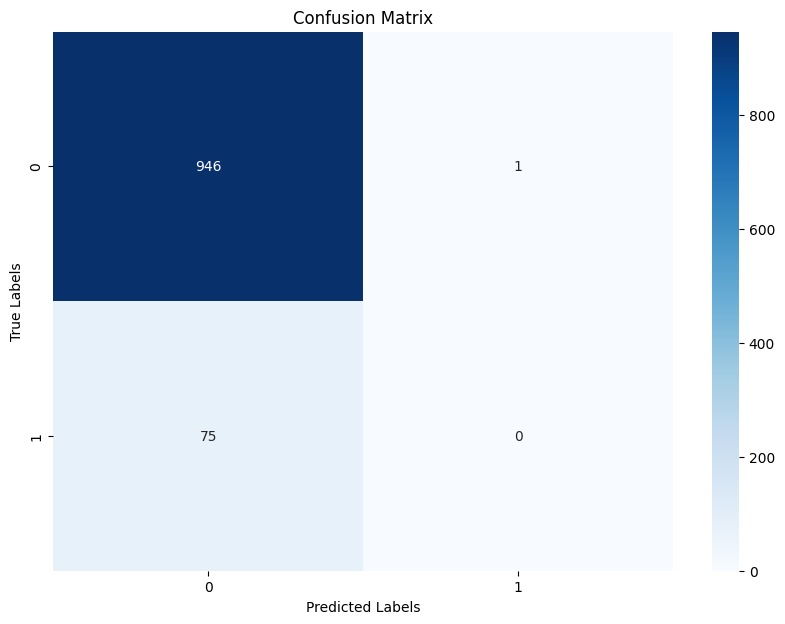

Accuracy train: 0.9571917808219178
Accuracy test: 0.9256360078277887
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       947
           1       0.00      0.00      0.00        75

    accuracy                           0.93      1022
   macro avg       0.46      0.50      0.48      1022
weighted avg       0.86      0.93      0.89      1022



In [199]:
cm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the accuracy score
print("Accuracy train:", reg.score(X_train, Y_train))
print("Accuracy test:", reg.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred, zero_division=1))

In [200]:
# TODO <1>: Implementati functia de sigmoida logistica
def logistic(x):
    # TODO: Inlocuiti aici cu expresia functiei de sigmoida logistica
    # Atentie: x poate fi un vector numpy, deci operatiile trebuie facute pe vectori
    # return np.zeros_like(x)  
    return np.array([1 / (1 + np.exp(-x)) for x in x])

In [201]:
# TODO <2.1>: Implementati expresia pentru Negative Log Likelihood - functia J(w), unde Y este predictia data de modelul logistic, 
# iar T sunt etichetele de clasa pentru cele N exemple din setul de date
def nll(Y, T):
    N = T.shape[0]

    # TODO: Inlocuiti aici cu expresia functiei de Negative Log Likelihood
    # Hint: folositi notiunea de indexare logica din numpy si faptul ca T poate fi 0 sau 1
    return -sum([t * np.log(y) if t == 1 else (1 - t) * np.log(1 - y) for y, t in zip(Y, T)]) / N

In [202]:
# TODO <2.2>: Implementati expresia care intoarce acuratetea clasificarii
def accuracy(Y, T):
    N = Y.shape[0]

    # TODO: Inlocuiti aici cu expresia functiei de acuratete
    # Hint: folositi notiunea de indexare logica din numpy si faptul ca 
    #       in numpy True este echivalent cu 1 si False cu 0
    return sum([(t and y >= 0.5) or (not t and y < 0.5) for y, t in zip(Y, T)]) / N

In [203]:
def predict_logistic(X, w):
    # TODO <3.1> : Calculati predictia Y a modelului logistic antrenat (ponderile w invatate)
    # Hint: urmariti explicatiile de utilizare ale functiei `numpy.dot` pentru a putea calcula 
    # produsele scalare intre toti vectorii x^(i) si ponderile w intr-un singur apel
    N = X.shape[0]
    dots = [np.dot(x, w) for x in X]
    return np.array(logistic(dots))

In [204]:
def train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=.01, epochs_no=1000):
    # TODO <3.2> : Antrenati modelul logistic (ponderile W), executand epochs_no pasi din algoritmul de gradient descent
    (N, D) = X_train.shape
    
    # Initializare ponderi
    w = np.random.randn(D)
    
    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for epoch in range(epochs_no):
        # 1. Obtineti Y_train si Y_test folosind functia predict_logistic
        Y_train = predict_logistic(X_train, w)
        Y_test = predict_logistic(X_test, w)
        # 2. Adaugati acuratetea si negative log likelihood-ul pentru setul de antrenare si de testare 
        #    la fiecare pas; utilizati functiile accuracy si nll definite anterior
        train_acc.append(accuracy(Y_train, T_train))
        test_acc.append(accuracy(Y_test, T_test))

        train_nll.append(nll(Y_train, T_train))
        test_nll.append(nll(Y_test, T_test))
        # 3. Actualizati ponderile w folosind regula de actualizare a gradientului
        gradient = np.dot(np.transpose(X_train), (Y_train - T_train)) / N
        w = w - lr * gradient     

    return w, train_nll, test_nll, train_acc, test_acc

In [205]:
def visualize_dataset(X, T, Y=None, w=None, other_w=None):
    m = ["x", "o"]  # Indicates true class
    col = ["red", "blue"]  # Indicates prediction
    fig = plt.figure(); plt.axis('equal')
    if Y is not None:
        idx_tp = np.logical_and(T >= .5, Y >= .5) # True positives
        idx_fp = np.logical_and(T < .5, Y >= .5) # False positives
        idx_fn = np.logical_and(T >= .5, Y < .5) # False negatives
        idx_tn = np.logical_and(T < .5, Y < .5) # True negatives
        
        plt.scatter(X[idx_tp,0], X[idx_tp,1], marker=m[0], c="red", label="TP")
        plt.scatter(X[idx_fp,0], X[idx_fp,1], marker=m[1], c="red", label="FP")
        plt.scatter(X[idx_fn,0], X[idx_fn,1], marker=m[0], c="blue", label="FN")
        plt.scatter(X[idx_tn,0], X[idx_tn,1], marker=m[1], c="blue", label="TN")

    else:
        idx_pos, idx_neg = (T > .5), (T < .5)
        plt.scatter(X[idx_pos,0], X[idx_pos,1], marker=m[0], color="blue", label="Pos")
        plt.scatter(X[idx_neg,0], X[idx_neg,1], marker=m[1], color="blue", label="Neg")
    
    if w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -w[0] / w[1] * __x - w[2] / w[1]
        plt.plot(__x, __y, color="black")

    if other_w is not None:
        __x = np.linspace(0, 1, 100)
        __y = -other_w[0] / other_w[1] * __x - other_w[2] / other_w[1]
        plt.plot(__x, __y, color="orange")

    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    plt.show()

In [206]:
# predict acv using lab code
N_EPOCHS = 500  #@param {type: "slider", default: 500, min: 100, max: 1000}
X_train = X_train.values.tolist()
X_train = np.array([np.array(x) for x in X_train])

Y_train = Y_train.values.tolist()
Y_train = np.array([np.array(y) for y in Y_train])

X_test = X_test.values.tolist()
X_test = np.array([np.array(x) for x in X_test])

Y_test = Y_test.values.tolist()
Y_test = np.array([np.array(y) for y in Y_test])

w, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(X_train, Y_train, X_test, Y_test, lr=0.1, epochs_no=N_EPOCHS)

Y_pred = predict_logistic(X_test, w)


Acuratete finala pe setul initial - train: 0.9567025440313112, test: 0.9256360078277887


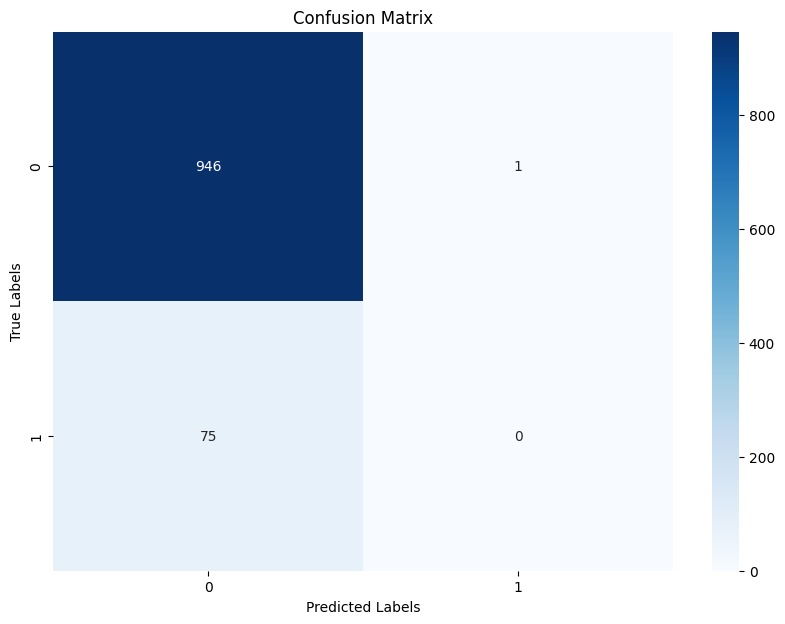

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       947
           1       0.00      0.00      0.00        75

    accuracy                           0.93      1022
   macro avg       0.46      0.50      0.48      1022
weighted avg       0.86      0.93      0.89      1022



In [207]:
print(f"Acuratete finala pe setul initial - train: {train_acc[-1]}, test: {test_acc[-1]}")

Y_pred = [1 if y >= 0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(Y_test, Y_pred, zero_division=1))


In [208]:
# predict salary using scikit-learn
Y_train = salary_train_std_encoded['money_<=50K'].copy()
X_train = salary_train_std_encoded.copy()
X_train.drop('money_<=50K', axis=1, inplace=True)
X_train.drop('money_>50K', axis=1, inplace=True)
reg = LogisticRegression(max_iter=1000, solver='newton-cholesky').fit(X_train, Y_train)

Y_test = salary_test_std_encoded['money_<=50K'].copy()
X_test = salary_test_std_encoded.copy()
X_test.drop('money_<=50K', axis=1, inplace=True)
X_test.drop('money_>50K', axis=1, inplace=True)
Y_pred = reg.predict(X_test)

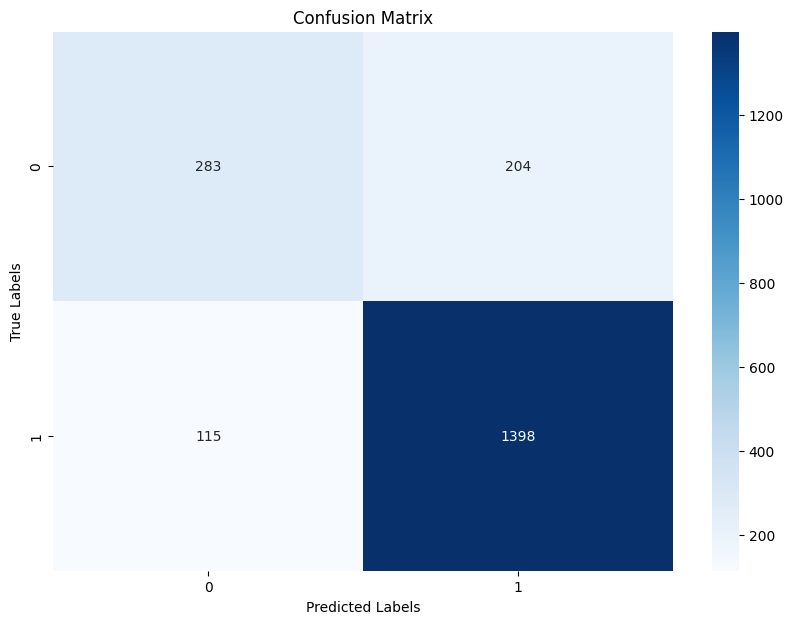

Accuracy train: 0.8541067633454181
Accuracy test: 0.8405
              precision    recall  f1-score   support

       False       0.71      0.58      0.64       487
        True       0.87      0.92      0.90      1513

    accuracy                           0.84      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.83      0.84      0.83      2000



In [209]:
cm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the accuracy score
print("Accuracy train:", reg.score(X_train, Y_train))
print("Accuracy test:", reg.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred, zero_division=1))

In [210]:
# predict salary using lab code
N_EPOCHS = 500  #@param {type: "slider", default: 500, min: 100, max: 1000}
X_train = X_train.values.tolist()
X_train = np.array([np.array(x) for x in X_train])

Y_train = Y_train.values.tolist()
Y_train = np.array([np.array(y) for y in Y_train])

X_test = X_test.values.tolist()
X_test = np.array([np.array(x) for x in X_test])

Y_test = Y_test.values.tolist()
Y_test = np.array([np.array(y) for y in Y_test])

w, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(X_train, Y_train, X_test, Y_test, lr=0.1, epochs_no=N_EPOCHS)

Y_pred = predict_logistic(X_test, w)


Acuratete finala pe setul initial - train: 0.8212276534566821, test: 0.8085


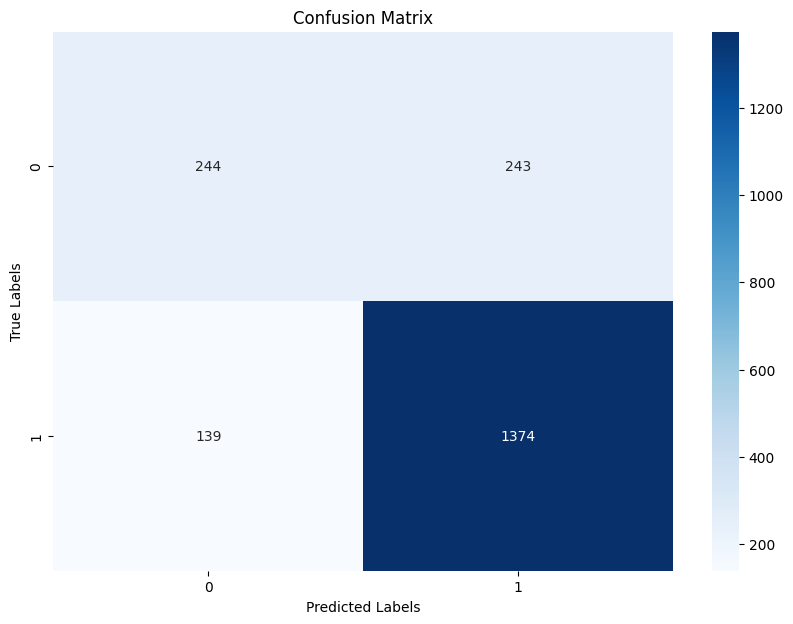

              precision    recall  f1-score   support

       False       0.64      0.50      0.56       487
        True       0.85      0.91      0.88      1513

    accuracy                           0.81      2000
   macro avg       0.74      0.70      0.72      2000
weighted avg       0.80      0.81      0.80      2000



In [211]:
print(f"Acuratete finala pe setul initial - train: {train_acc[-1]}, test: {test_acc[-1]}")

Y_pred = [1 if y >= 0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(classification_report(Y_test, Y_pred))

In [212]:
def plot_evolution(train_acc, test_acc, train_nll, test_nll):
    epochs_no = len(train_acc)
    fig, (ax1, ax2) = plt.subplots(2,1)

    # Afisam cu verde acuratetea pe setul de antrenare si cu rosu acuratetea pe setul de testare
    ax1.plot(range(epochs_no), train_acc, label="Train Accuracy", color="green")
    ax1.plot(range(epochs_no), test_acc, label="Test Accuracy", color="red")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc='lower right', ncol=1)

    # Afisam cu verde NLL pe setul de antrenare si cu rosu NLL pe setul de testare
    ax2.plot(range(epochs_no), train_nll, label="Train NLL", color="green")
    ax2.plot(range(epochs_no), test_nll, label="Test NLL", color="red")
    ax2.set_xlabel("iteration")
    ax2.set_ylabel("NLL")
    ax2.legend(loc='upper right', ncol=1)
    
    plt.show()

In [213]:
class Layer:

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        pass  # If a layer has no parameters, then this function does nothing

In [214]:
class FeedForwardNetwork:
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy: np.ndarray) -> np.ndarray:
        # TODO <0> : Calculati gradientul cu fiecare strat
        # Pasi:
        #   - iterati in ordine inversa prin straturile retelei si apelati pentru fiecare dintre ele metoda backward
        #   - folositi self._inputs salvate la fiecare pas din forward pentru a calcula gradientul cu respectivul strat
        #   - transmiteti mai departe valoarea returnata de metoda backward catre urmatorul strat
        #   - incepeti cu gradientul fata de output (dy, primit ca argument).
        for i in reversed(range(len(self.layers))):
            dy = self.layers[i].backward(self._inputs[i], dy)
            

        del self._inputs
        return dy
    
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

In [215]:
class Linear(Layer):
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)
   
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <1>: calculați ieșirea unui strat liniar
        # x - este o matrice numpy B x M, unde 
        #    B - dimensiunea batchului, 
        #    M - dimensiunea caracteristicilor de intrare (insize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înainte într-o singură trecere
        # pentru toate exemplele din batch
        y = x @ self.weight + self.bias
        return y
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <2> : calculați dweight, dbias și returnați dx
        # x - este o matrice numpy B x M, unde 
        #     B - dimensiunea batchului, 
        #     M - dimensiunea caracteristicilor (features) de intrare (insize)
        # dy - este o matrice numpy B x N, unde 
        #     B - dimensiunea batchului, 
        #     N - dimensiunea caracteristicilor (features) de ieșire (outsize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înapoi într-o singură trecere 
        #       pentru self.dweight
        # Sugestie: folosiți numpy.sum pentru a implementa propagarea înapoi într-o singură trecere pentru self.dbias
        self.dweight = np.transpose(x) @ dy
        self.dbias = np.sum(dy, axis=0)
        return dy @ np.transpose(self.weight)
    
    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))

In [216]:
class ReLU(Layer):
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <3> : Calculați ieșirea unei unități liniare rectificate
        return np.maximum(x, 0)
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <4> : Calculați gradientul față de x
        # x - este o matrice numpy B x M, unde B - dimensiunea batchului, M - dimensiunea caracteristicilor
        # Sugestie: utilizați indexarea logică numpy pentru a determina unde intrarea (x) este negativă
        #       și faceți gradientul 0 pentru acele exemple
        
        return dy * (x > 0)

In [217]:
class CrossEntropy:
    
    def __init__(self):
        pass
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 1).reshape(-1,1)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        # TODO <5> : Calculați probabilitatea logaritmică negativă
        # y - matrice numpy (B, K), unde B - dimensiunea batch-ului, K - numărul de clase (numărul de logaritmi)
        # t - vector numpy (B, ), unde B - dimensiunea batch-ului, care indică clasa corectă
        # Pasi: 
        #   - folositi softmax() pe intrari pentru a transforma logits (y) in probabilitati
        #   - selectati probabilitatile care corespund clasei reale (t)
        #   - calculati -log() peste probabilitati
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
        y_prob = self.softmax(y)
        y_active = y_prob[np.arange(len(t)), t]
        y_log = np.sum(-np.log(y_active)) / y.shape[0]
        return y_log
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        # TODO <6> : Calculati dl/dy
        # Pasi: 
        #   - calculati softmax(y) pentru a determina probabilitatea ca fiecare element sa apartina clasei i
        #   - ajustati gradientii pentru clasa corecta: aplicati scaderea dL/dy_i = pi - delta_ti conform formulelor de mai sus
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
        y_prob = self.softmax(y)
        y_prob[np.arange(len(t)), t] -= 1
        return y_prob / y.shape[0]


In [218]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    # TODO <7> : Calculati acuratetea
    # Pasi: 
    # - folosiți np.argmax() pentru a afla predictiile retelei
    # - folositi np.sum() pentru a numara cate sunt corecte comparand cu ground truth (t)
    # - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
    return np.sum(np.argmax(y, axis=1) == t) / len(t)

In [219]:
# predict avc with mlp using scikit-learn
Y_train = avc_train_std_encoded['cerebrovascular_accident'].copy()
X_train = avc_train_std_encoded.copy()
X_train.drop('cerebrovascular_accident', axis=1, inplace=True)
mlp = MLPClassifier(max_iter=6000, hidden_layer_sizes= (20, 20, 20), solver= 'sgd', learning_rate_init=.005, batch_size=200)
mlp.fit(X_train, Y_train)

Y_test = avc_test_std_encoded['cerebrovascular_accident'].copy()
X_test = avc_test_std_encoded.copy()
X_test.drop('cerebrovascular_accident', axis=1, inplace=True)

Y_pred = mlp.predict(X_test)

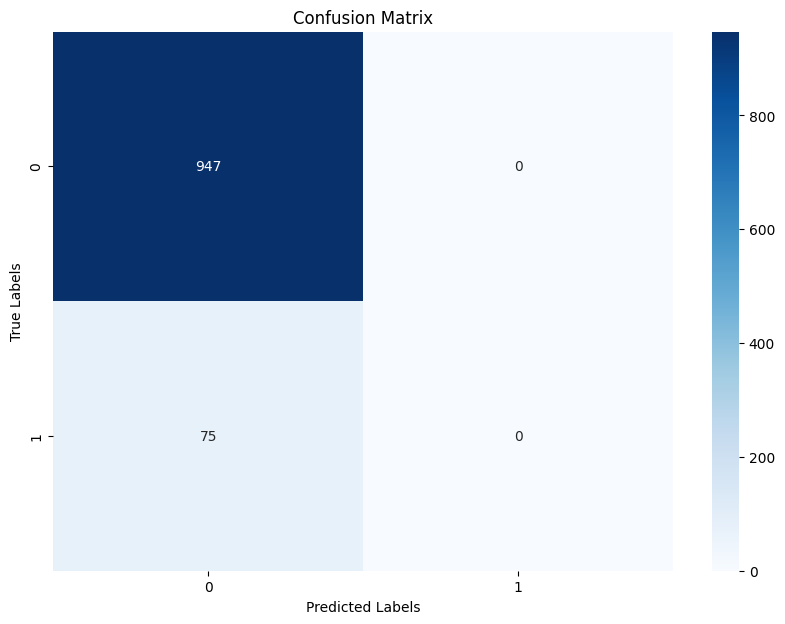

Accuracy train: 0.9574363992172211
Accuracy test: 0.9266144814090019
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       947
           1       1.00      0.00      0.00        75

    accuracy                           0.93      1022
   macro avg       0.96      0.50      0.48      1022
weighted avg       0.93      0.93      0.89      1022



In [220]:
cm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the accuracy score
print("Accuracy train:", mlp.score(X_train, Y_train))
print("Accuracy test:", mlp.score(X_test, Y_test))

print(classification_report(Y_test, Y_pred, zero_division=1))


In [221]:
# predict avc using mlp lab code
X_train = X_train.values.tolist()
X_train = np.array([np.array(x) for x in X_train])

Y_train = Y_train.values.tolist()
Y_train = np.array([np.array(y) for y in Y_train])

X_test = X_test.values.tolist()
X_test = np.array([np.array(x) for x in X_test])

Y_test = Y_test.values.tolist()
Y_test = np.array([np.array(y) for y in Y_test])

BATCH_SIZE = 200
HIDDEN_UNITS = 100
EPOCHS_NO = 100

optimize_args = {'mode': 'SGD', 'lr': .005}

net = FeedForwardNetwork([Linear(X_train.shape[1], HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS, 2)])
cost_function = CrossEntropy()

train_acc_list, test_acc_list = [], []
train_nll_list, test_nll_list = [], []

for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(X_train), BATCH_SIZE)):
        # 1. Pregatim urmatorul batch
        x = X_train[idx:min(idx + BATCH_SIZE, X_train.shape[0] - 1),:].reshape(-1, X_train.shape[1])
        # print(x)
        t = Y_train[idx:min(idx + BATCH_SIZE, Y_train.shape[0] - 1)]
        t = t.astype(int)

        # 2. Calculam gradientul
        # TODO <8>:
        # Hint: propagam batch-ul `x` prin reteaua `net`
        #       calculam eroarea pe baza iesirii retelei, folosind `cost_function` 
        #       obtinem gradientul erorii in raport cu iesirea retelei, folosind `backward` pentru `cost_function`
        #       obtinem gradientul in raport cu ponderile retelei `net` folosind `backward` pentru `net`
        y = net.forward(x)
        loss = cost_function.forward(y, t)
        de = cost_function.backward(y, t)
        net.backward(de)
        
        # 3. Actualizam parametrii retelei
        net.update(**optimize_args)
        
        print(f'\rEpoch {epoch + 1:02d} '
              f'| Batch {b_no:03d} '
              f'| Train NLL: {loss:6.3f} '
              f'| Train Acc: {accuracy(y, t) * 100:6.2f}% ', end='')

    train_nll_list.append(loss)
    train_acc_list.append(accuracy(y, t))

    y = net.forward(X_test.reshape(-1, X_test.shape[1]), train=False)
    Y_test = Y_test.astype(int)
    test_nll = cost_function.forward(y, Y_test)
    test_nll_list.append(test_nll)
    test_acc_list.append(accuracy(y, Y_test))
    print(f'| Test NLL: {test_nll:6.3f} '
          f'| Test Acc: {accuracy(y, Y_test) * 100:3.2f}%')

Epoch 01 | Batch 020 | Train NLL:  0.404 | Train Acc:  86.21% | Test NLL:  0.394 | Test Acc: 87.18%
Epoch 02 | Batch 020 | Train NLL:  0.295 | Train Acc:  94.25% | Test NLL:  0.299 | Test Acc: 91.00%
Epoch 03 | Batch 020 | Train NLL:  0.267 | Train Acc:  94.25% | Test NLL:  0.276 | Test Acc: 92.56%
Epoch 04 | Batch 020 | Train NLL:  0.257 | Train Acc:  94.25% | Test NLL:  0.269 | Test Acc: 92.76%
Epoch 05 | Batch 020 | Train NLL:  0.252 | Train Acc:  94.25% | Test NLL:  0.267 | Test Acc: 92.76%
Epoch 06 | Batch 020 | Train NLL:  0.250 | Train Acc:  94.25% | Test NLL:  0.265 | Test Acc: 92.76%
Epoch 07 | Batch 020 | Train NLL:  0.249 | Train Acc:  94.25% | Test NLL:  0.265 | Test Acc: 92.66%
Epoch 08 | Batch 020 | Train NLL:  0.248 | Train Acc:  94.25% | Test NLL:  0.264 | Test Acc: 92.66%
Epoch 09 | Batch 020 | Train NLL:  0.247 | Train Acc:  94.25% | Test NLL:  0.263 | Test Acc: 92.66%
Epoch 10 | Batch 020 | Train NLL:  0.246 | Train Acc:  94.25% | Test NLL:  0.262 | Test Acc: 92.66%


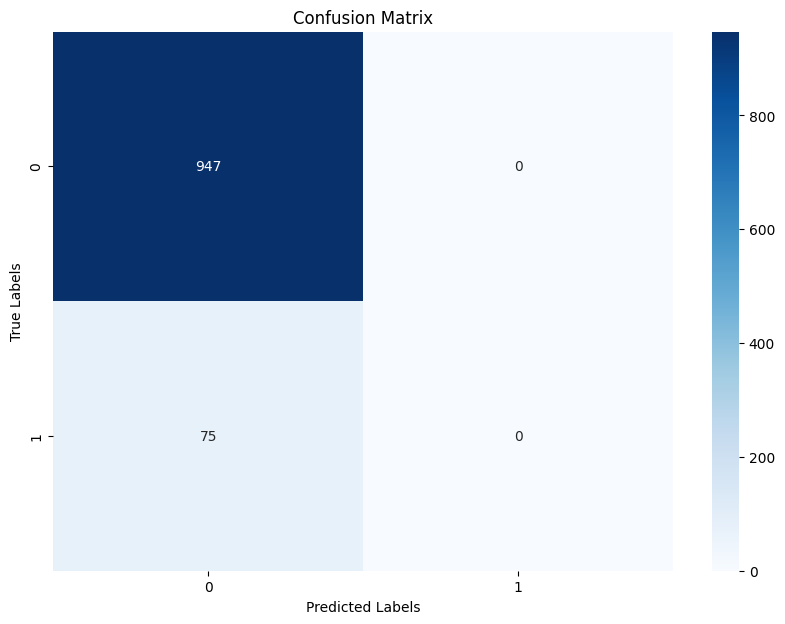

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       947
           1       1.00      0.00      0.00        75

    accuracy                           0.93      1022
   macro avg       0.96      0.50      0.48      1022
weighted avg       0.93      0.93      0.89      1022



In [222]:
cm = confusion_matrix(Y_test, np.argmax(y, axis=1))
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(classification_report(Y_test, np.argmax(y, axis=1), zero_division=1))

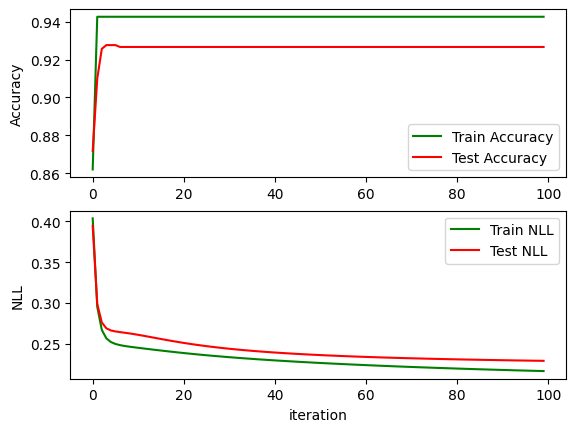

In [223]:
plot_evolution(train_acc_list, test_acc_list, train_nll_list, test_nll_list)

In [224]:
# predict salary with mlp using scikit-learn
Y_train = salary_train_std_encoded['money_<=50K'].copy()
X_train = salary_train_std_encoded.copy()
X_train.drop('money_<=50K', axis=1, inplace=True)
X_train.drop('money_>50K', axis=1, inplace=True)
# prea putine layere prea incet prea multe overfit
reg = MLPClassifier(max_iter=1000, alpha=0.00000001, hidden_layer_sizes=(20, 20, 20), batch_size=200).fit(X_train, Y_train)

Y_test = salary_test_std_encoded['money_<=50K'].copy()
X_test = salary_test_std_encoded.copy()
X_test.drop('money_<=50K', axis=1, inplace=True)
X_test.drop('money_>50K', axis=1, inplace=True)
Y_pred = reg.predict(X_test)

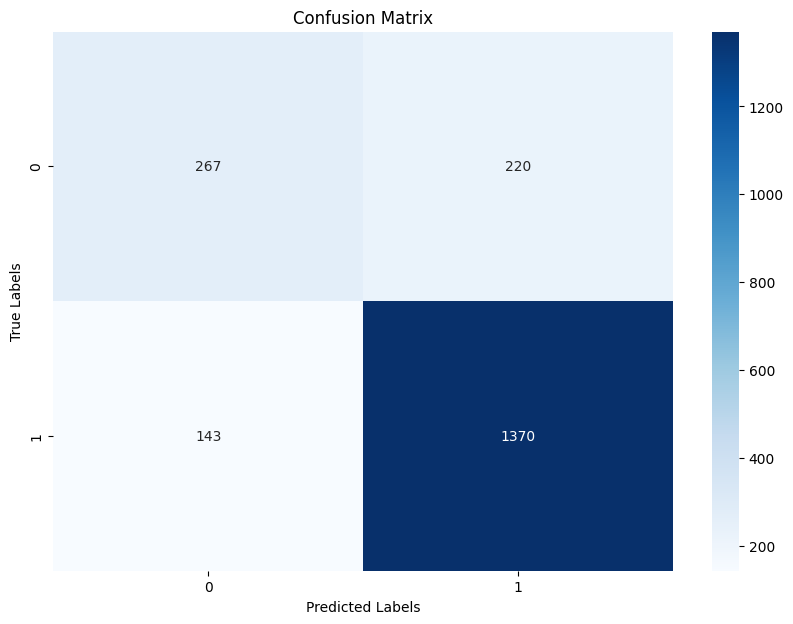

Accuracy train: 0.9271158894861857
Accuracy test: 0.8185
              precision    recall  f1-score   support

       False       0.65      0.55      0.60       487
        True       0.86      0.91      0.88      1513

    accuracy                           0.82      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.81      0.82      0.81      2000



In [225]:
cm = confusion_matrix(Y_test, Y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the accuracy score
print("Accuracy train:", reg.score(X_train, Y_train))
print("Accuracy test:", reg.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred, zero_division=1))


In [226]:
# predict salary using mlp lab code
X_train = X_train.values.tolist()
X_train = np.array([np.array(x) for x in X_train])

Y_train = Y_train.values.tolist()
Y_train = np.array([np.array(y) for y in Y_train])

X_test = X_test.values.tolist()
X_test = np.array([np.array(x) for x in X_test])

Y_test = Y_test.values.tolist()
Y_test = np.array([np.array(y) for y in Y_test])

BATCH_SIZE = 200
HIDDEN_UNITS = 100
EPOCHS_NO = 100

optimize_args = {'mode': 'SGD', 'lr': .005}

net = FeedForwardNetwork([Linear(X_train.shape[1], HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS, 2)])
cost_function = CrossEntropy()
train_acc_list, test_acc_list = [], []
train_nll_list, test_nll_list = [], []

for epoch in range(EPOCHS_NO):
    for b_no, idx in enumerate(range(0, len(X_train), BATCH_SIZE)):
        # 1. Pregatim urmatorul batch
        x = X_train[idx:min(idx + BATCH_SIZE, X_train.shape[0] - 1),:].reshape(-1, X_train.shape[1])
        # print(x)
        t = Y_train[idx:min(idx + BATCH_SIZE, Y_train.shape[0] - 1)]
        t = t.astype(int)

        # 2. Calculam gradientul
        # TODO <8>:
        # Hint: propagam batch-ul `x` prin reteaua `net`
        #       calculam eroarea pe baza iesirii retelei, folosind `cost_function` 
        #       obtinem gradientul erorii in raport cu iesirea retelei, folosind `backward` pentru `cost_function`
        #       obtinem gradientul in raport cu ponderile retelei `net` folosind `backward` pentru `net`
        y = net.forward(x)
        loss = cost_function.forward(y, t)
        de = cost_function.backward(y, t)
        net.backward(de)
        
        # 3. Actualizam parametrii retelei
        net.update(**optimize_args)
        
        print(f'\rEpoch {epoch + 1:02d} '
              f'| Batch {b_no:03d} '
              f'| Train NLL: {loss:6.3f} '
              f'| Train Acc: {accuracy(y, t) * 100:6.2f}% ', end='')

    train_nll_list.append(loss)
    train_acc_list.append(accuracy(y, t))

    y = net.forward(X_test.reshape(-1, X_test.shape[1]), train=False)
    Y_test = Y_test.astype(int)
    test_nll = cost_function.forward(y, Y_test)
    test_nll_list.append(test_nll)
    test_acc_list.append(accuracy(y, Y_test))

    print(f'| Test NLL: {test_nll:6.3f} '
          f'| Test Acc: {accuracy(y, Y_test) * 100:3.2f}%')

Epoch 01 | Batch 039 | Train NLL:  0.612 | Train Acc:  71.72% | Test NLL:  0.621 | Test Acc: 68.45%
Epoch 02 | Batch 039 | Train NLL:  0.526 | Train Acc:  78.28% | Test NLL:  0.541 | Test Acc: 75.70%
Epoch 03 | Batch 039 | Train NLL:  0.493 | Train Acc:  77.78% | Test NLL:  0.511 | Test Acc: 76.40%
Epoch 04 | Batch 039 | Train NLL:  0.474 | Train Acc:  78.79% | Test NLL:  0.492 | Test Acc: 76.40%
Epoch 05 | Batch 039 | Train NLL:  0.460 | Train Acc:  78.79% | Test NLL:  0.478 | Test Acc: 76.50%
Epoch 06 | Batch 039 | Train NLL:  0.449 | Train Acc:  78.79% | Test NLL:  0.466 | Test Acc: 76.60%
Epoch 07 | Batch 039 | Train NLL:  0.440 | Train Acc:  79.29% | Test NLL:  0.455 | Test Acc: 76.95%
Epoch 08 | Batch 039 | Train NLL:  0.432 | Train Acc:  79.80% | Test NLL:  0.447 | Test Acc: 77.45%
Epoch 09 | Batch 039 | Train NLL:  0.425 | Train Acc:  80.30% | Test NLL:  0.439 | Test Acc: 77.60%
Epoch 10 | Batch 039 | Train NLL:  0.420 | Train Acc:  81.31% | Test NLL:  0.433 | Test Acc: 77.70%


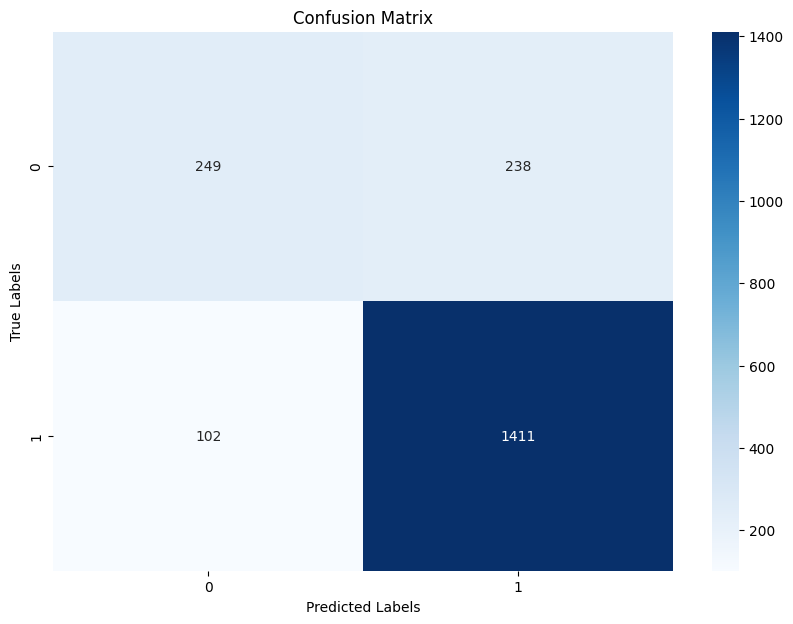

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       487
           1       0.86      0.93      0.89      1513

    accuracy                           0.83      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.82      0.83      0.82      2000



In [227]:
cm = confusion_matrix(Y_test, np.argmax(y, axis=1))
# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print(classification_report(Y_test, np.argmax(y, axis=1), zero_division=1))

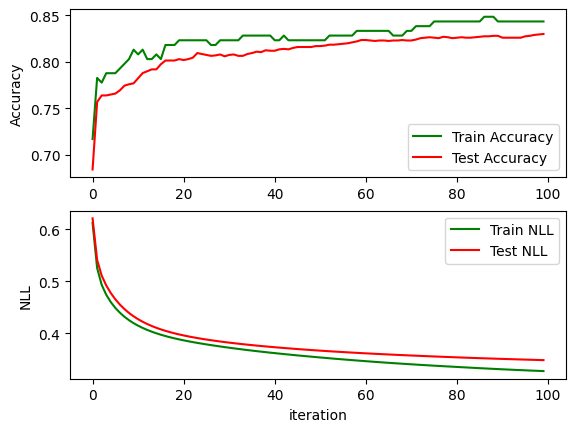

In [228]:
plot_evolution(train_acc_list, test_acc_list, train_nll_list, test_nll_list)